In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get Data
boom_day = pd.read_csv('/Users/4239114/Downloads/ML and AI course/BoomBike Casestudy/day.csv')
boom_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Understanding the data

In [3]:
boom_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
boom_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

With data details we understand that it doesn't have any null values

In [5]:
boom_day.shape

(730, 16)

In [6]:
boom_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Preparation

- column 'instant' and 'dteday' has significance with the data understanding so we can drop it.
- column 'temp' and 'atemp' are the same parameters in different units so one of the two can also be dropped.

In [7]:
boom_day = boom_day.drop(['instant','atemp', 'dteday'],axis=1)

In [8]:
boom_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,82,1518,1600


In [9]:
boom_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  casual      730 non-null    int64  
 11  registered  730 non-null    int64  
 12  cnt         730 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 74.3 KB


In [10]:
boom_day.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

With data details we understand that it doesn't have any null values

In [11]:
boom_day.shape

(730, 13)

In [12]:
boom_day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,97.250000,34.000021,3410.000000,6946.000000,8714.000000


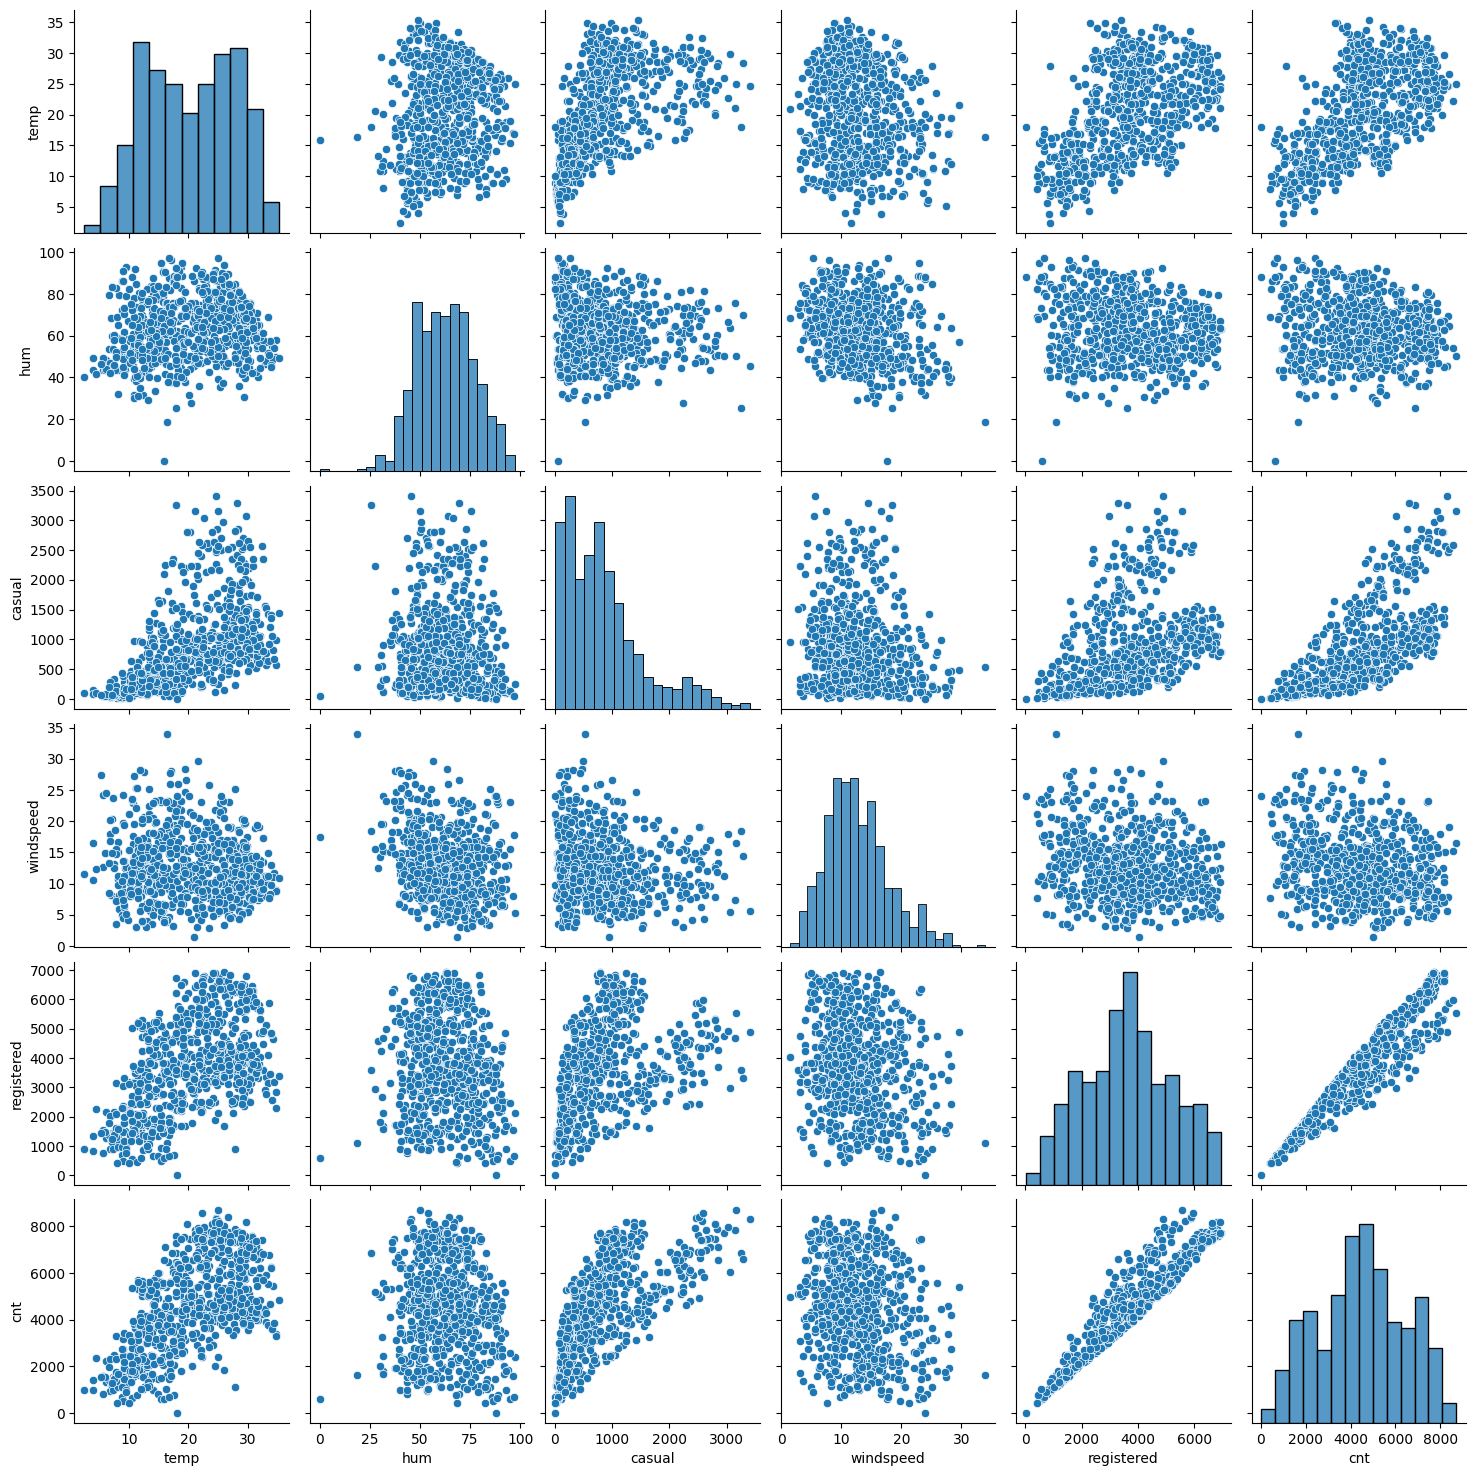

In [13]:
#visualizing the numeric variables of the dataset using pairplot 
sns.pairplot(boom_day, vars=['temp', 'hum','casual','windspeed','registered','cnt'])
plt.show()

We can see from the graph above, the count(cnt) variable has strong correlation with variables like temperature(temp), humidity(hum) and windspeed.

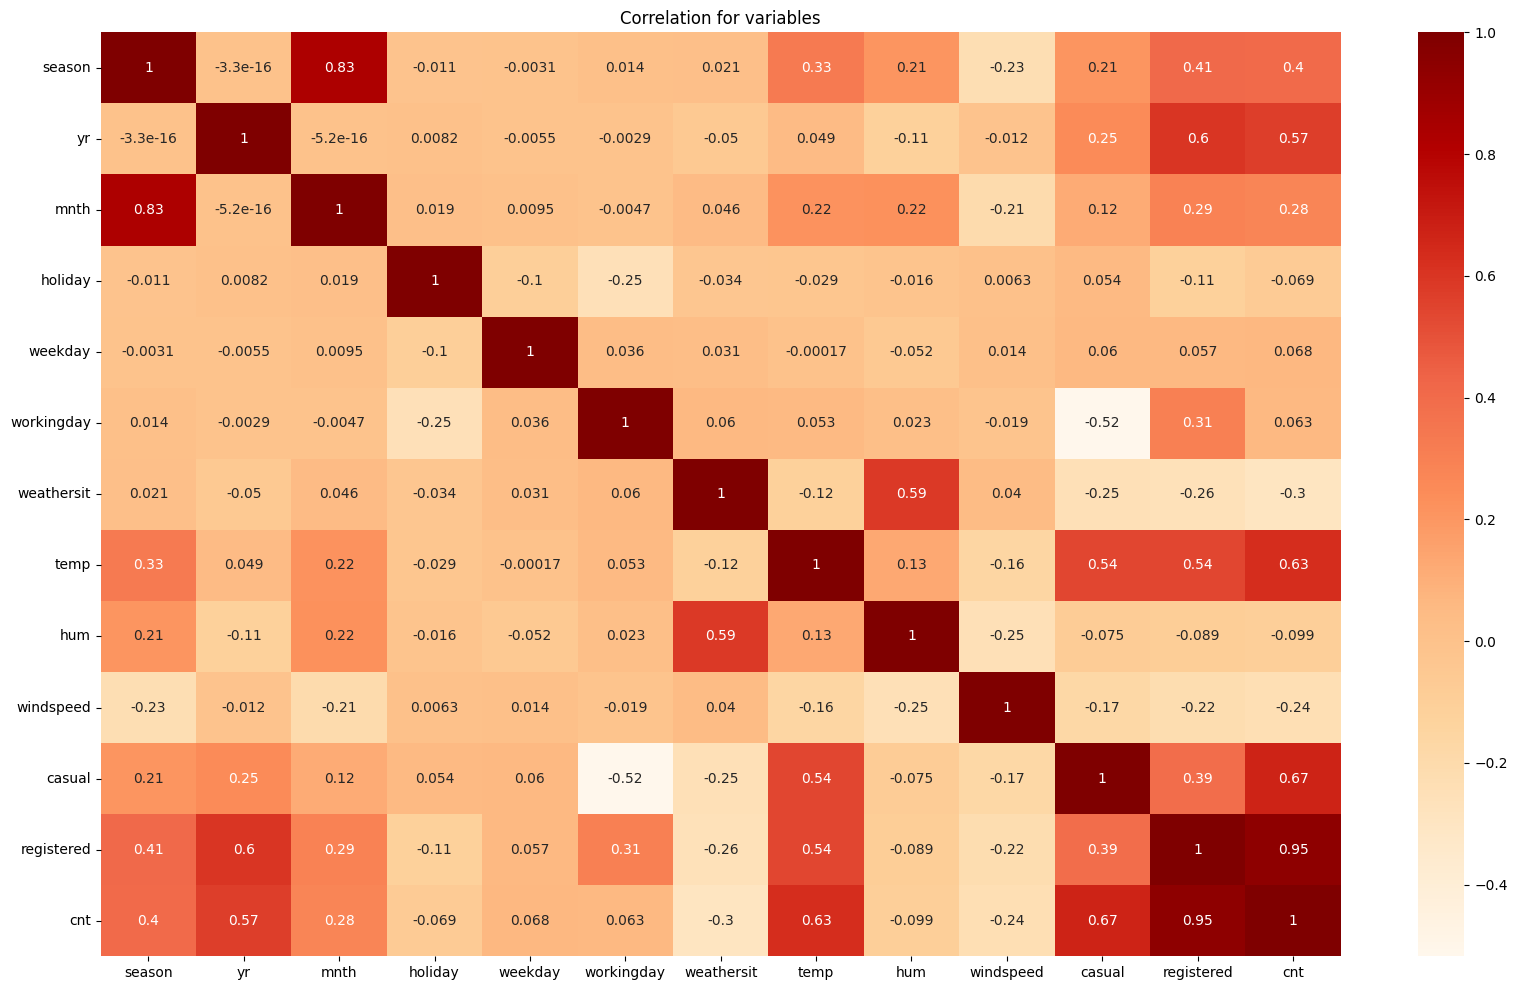

In [14]:
# Checking Coorelations further
plt.figure(figsize=(20, 12))
sns.heatmap(boom_day.corr(), cmap='OrRd', annot=True)
plt.title('Correlation for variables')
plt.show()


Here variables 'yr', 'temp', 'casual', 'registered' are highly correlated to count variable (cnt), we can conduct a linear regresssion model in upcoming code lines.

In [15]:
# mapping categorical variables with their subcategories for visualization analysis 
boom_day['season']=boom_day.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
boom_day['mnth']=boom_day.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boom_day['weathersit']=boom_day.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
boom_day['weekday']=boom_day.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [16]:
boom_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,82,1518,1600


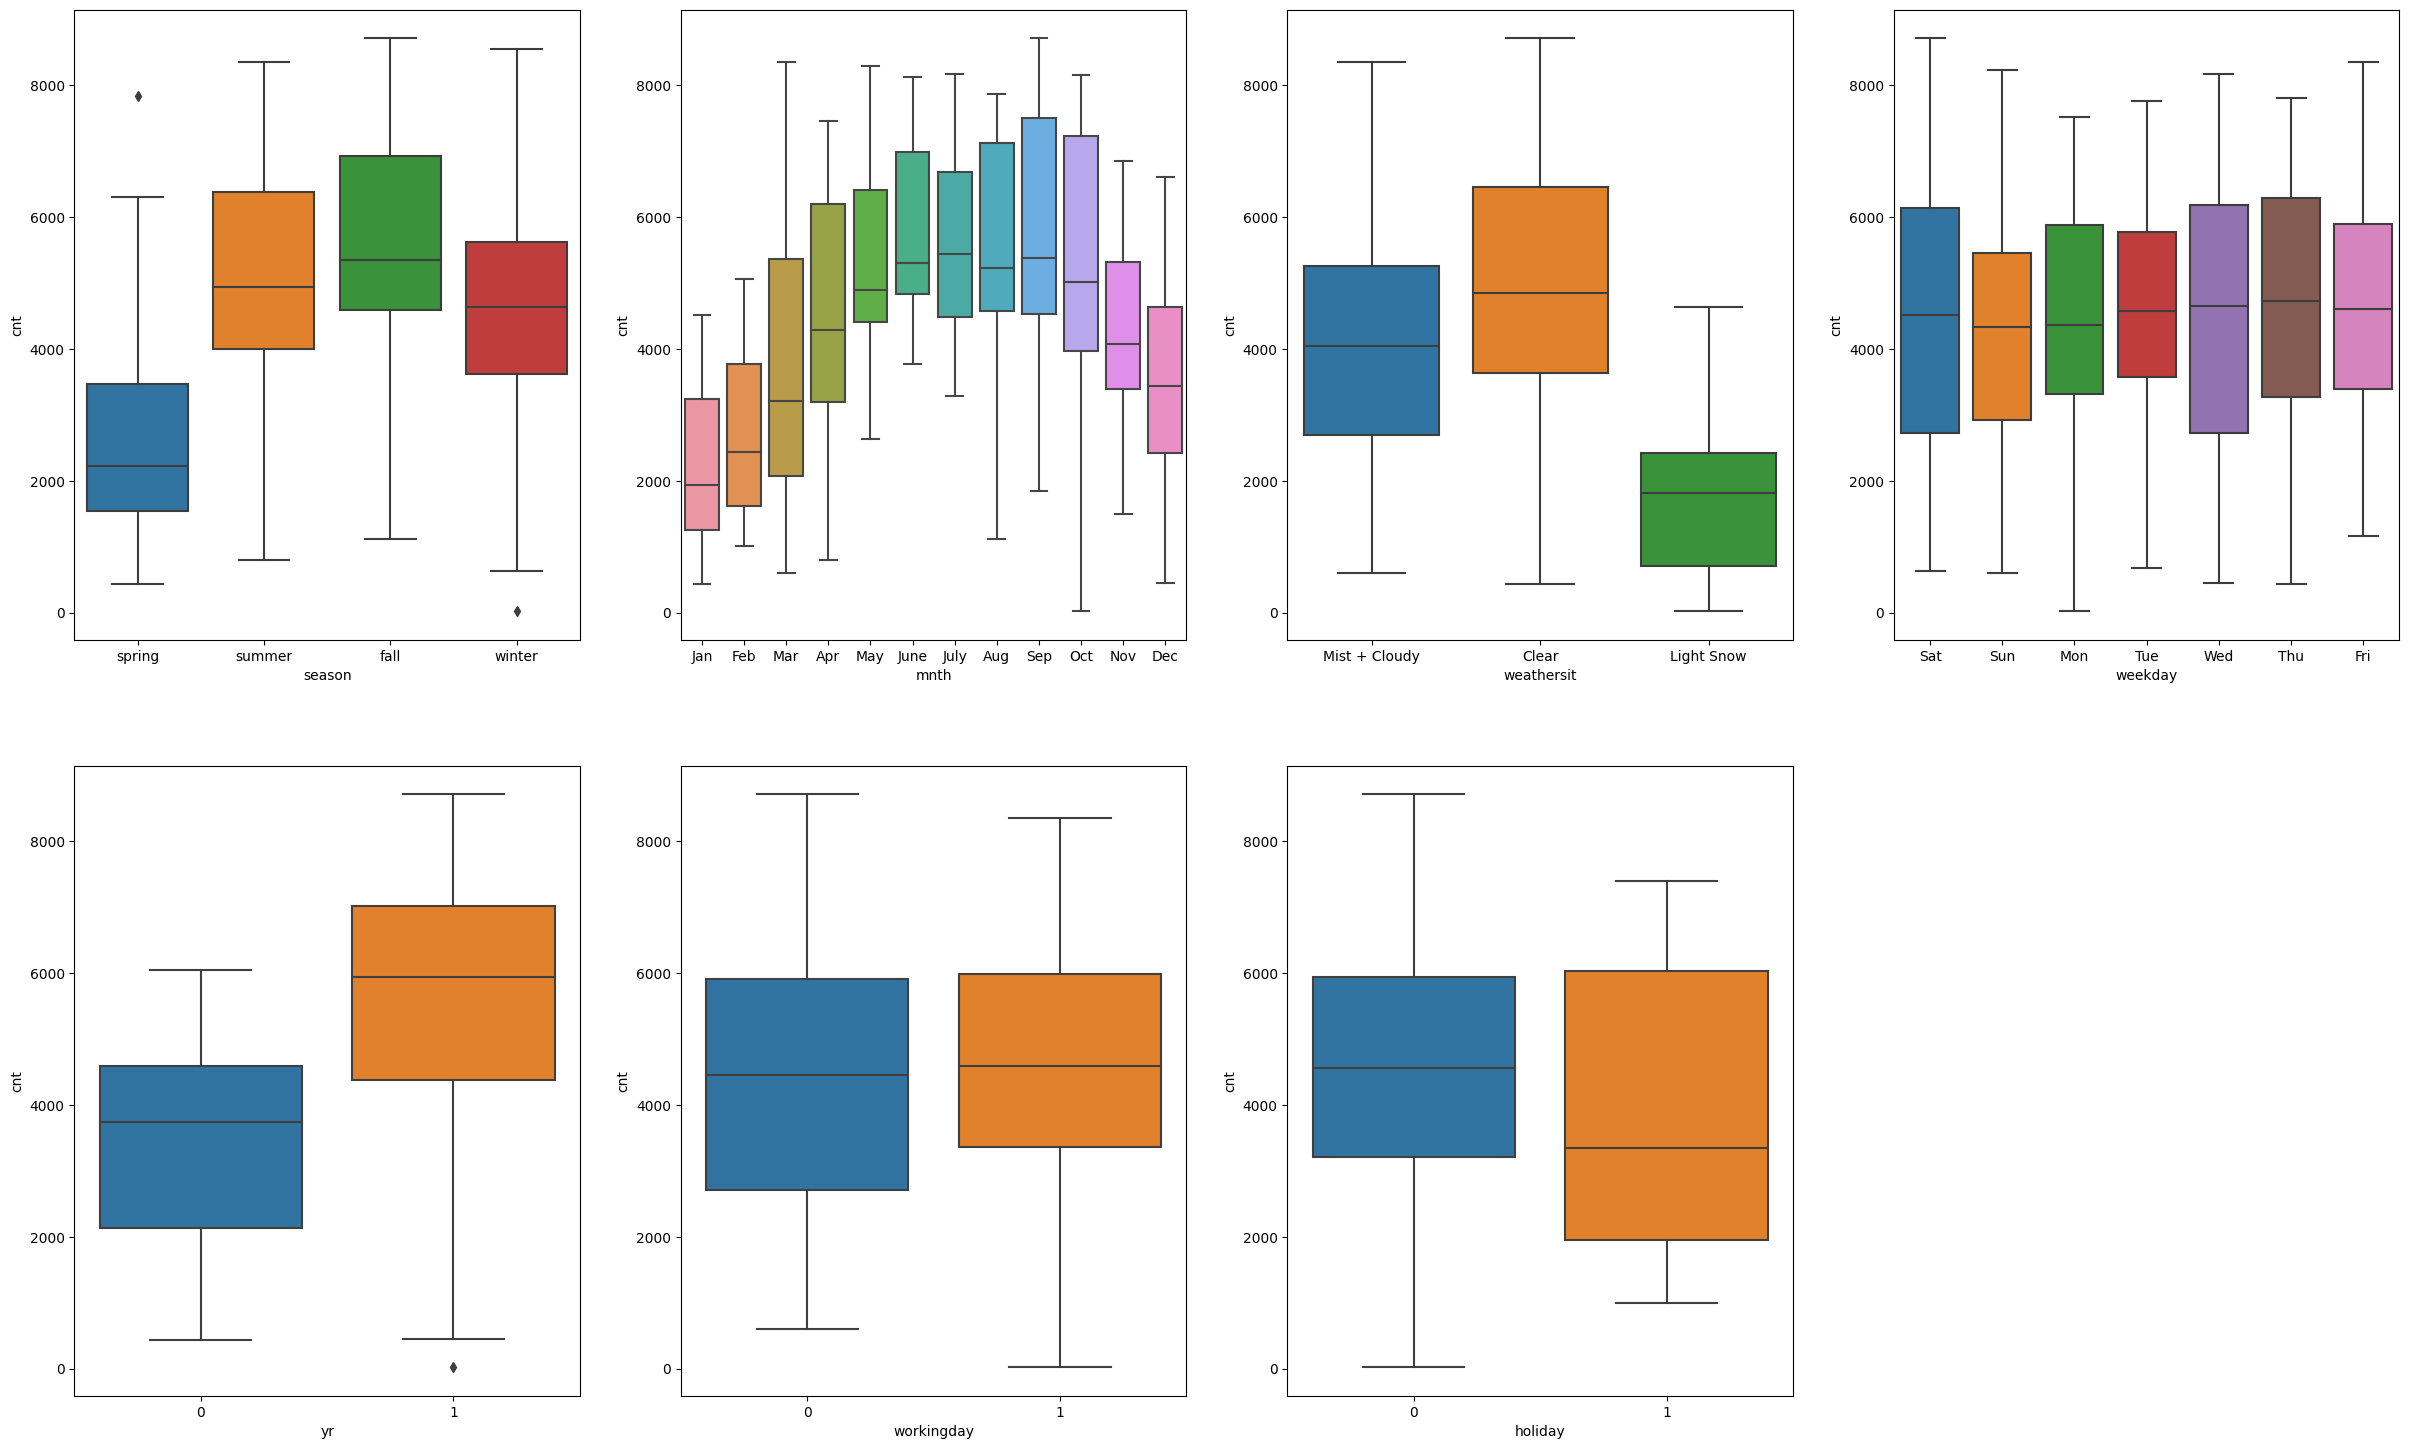

In [17]:
# visualize categoricals
plt.figure(figsize=(30, 18))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = boom_day)
plt.subplot(2,4,5)
sns.boxplot(x = 'yr', y = 'cnt', data = boom_day)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = boom_day)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = boom_day)
plt.subplot(2,4,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boom_day)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=boom_day)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=boom_day)
plt.show()

### Observations made using the plots

1. Users are more likely to rent bikes in the season of summer and fall.
2. Rental count is larger in the months of September and October.
3. Bike rentals were higher on days like Saturday, Wednesday and Thursday.
4. Renters rent more during clear weather.
5. More bikes were rented in 2019.
6. Bike rental rates are higher on holidays.
7. There isn't any significance difference in rental rates as per the workday parameter.

#### Creating dummy variables for seasons, month, weekday, weathersit


In [18]:
season = pd.get_dummies(boom_day.season, drop_first=True)
month = pd.get_dummies(boom_day.mnth, drop_first=True)
weekday = pd.get_dummies(boom_day.weekday, drop_first=True)
weathersit = pd.get_dummies(boom_day.weathersit, drop_first=True)


In [19]:
# now add the dummy variables to the original dataframe boom_day
boom_day = pd.concat([boom_day,month, weekday, weathersit, season], axis=1)

In [20]:
boom_day.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,True,False,False,False,False,False,True,True,False,False
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,False,True,False,False,False,False,True,True,False,False
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,False,False,False,False,True,False,False,True,False,False


In [21]:
boom_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         730 non-null    object 
 1   yr             730 non-null    int64  
 2   mnth           730 non-null    object 
 3   holiday        730 non-null    int64  
 4   weekday        730 non-null    object 
 5   workingday     730 non-null    int64  
 6   weathersit     730 non-null    object 
 7   temp           730 non-null    float64
 8   hum            730 non-null    float64
 9   windspeed      730 non-null    float64
 10  casual         730 non-null    int64  
 11  registered     730 non-null    int64  
 12  cnt            730 non-null    int64  
 13  Aug            730 non-null    bool   
 14  Dec            730 non-null    bool   
 15  Feb            730 non-null    bool   
 16  Jan            730 non-null    bool   
 17  July           730 non-null    bool   
 18  June      

In [22]:
boom_day.isnull().sum()

season           0
yr               0
mnth             0
holiday          0
weekday          0
workingday       0
weathersit       0
temp             0
hum              0
windspeed        0
casual           0
registered       0
cnt              0
Aug              0
Dec              0
Feb              0
Jan              0
July             0
June             0
Mar              0
May              0
Nov              0
Oct              0
Sep              0
Mon              0
Sat              0
Sun              0
Thu              0
Tue              0
Wed              0
Light Snow       0
Mist + Cloudy    0
spring           0
summer           0
winter           0
dtype: int64

With data details we understand that it doesn't have any null values

In [23]:
boom_day.shape

(730, 35)

In [24]:
boom_day.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [25]:
# Now drop the variables season, mnth, weekday, weathersit as dummies are created for it
boom_day.drop(['season','mnth','weekday','weathersit', 'casual','registered'], axis = 1, inplace = True)

In [26]:
boom_day.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,False,False,False,...,True,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,69.6087,16.652113,801,False,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0,0,1,8.050924,43.7273,16.636703,1349,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,False,False,False,...,False,False,False,False,True,False,False,True,False,False


In [27]:
boom_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    bool   
 8   Dec            730 non-null    bool   
 9   Feb            730 non-null    bool   
 10  Jan            730 non-null    bool   
 11  July           730 non-null    bool   
 12  June           730 non-null    bool   
 13  Mar            730 non-null    bool   
 14  May            730 non-null    bool   
 15  Nov            730 non-null    bool   
 16  Oct            730 non-null    bool   
 17  Sep            730 non-null    bool   
 18  Mon       

In [28]:
boom_day.isnull().sum()

yr               0
holiday          0
workingday       0
temp             0
hum              0
windspeed        0
cnt              0
Aug              0
Dec              0
Feb              0
Jan              0
July             0
June             0
Mar              0
May              0
Nov              0
Oct              0
Sep              0
Mon              0
Sat              0
Sun              0
Thu              0
Tue              0
Wed              0
Light Snow       0
Mist + Cloudy    0
spring           0
summer           0
winter           0
dtype: int64

With data details we understand that it doesn't have any null values

In [29]:
boom_day.shape

(730, 29)

In [30]:
boom_day.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


#### Let's check the coorelation graph again with new variables

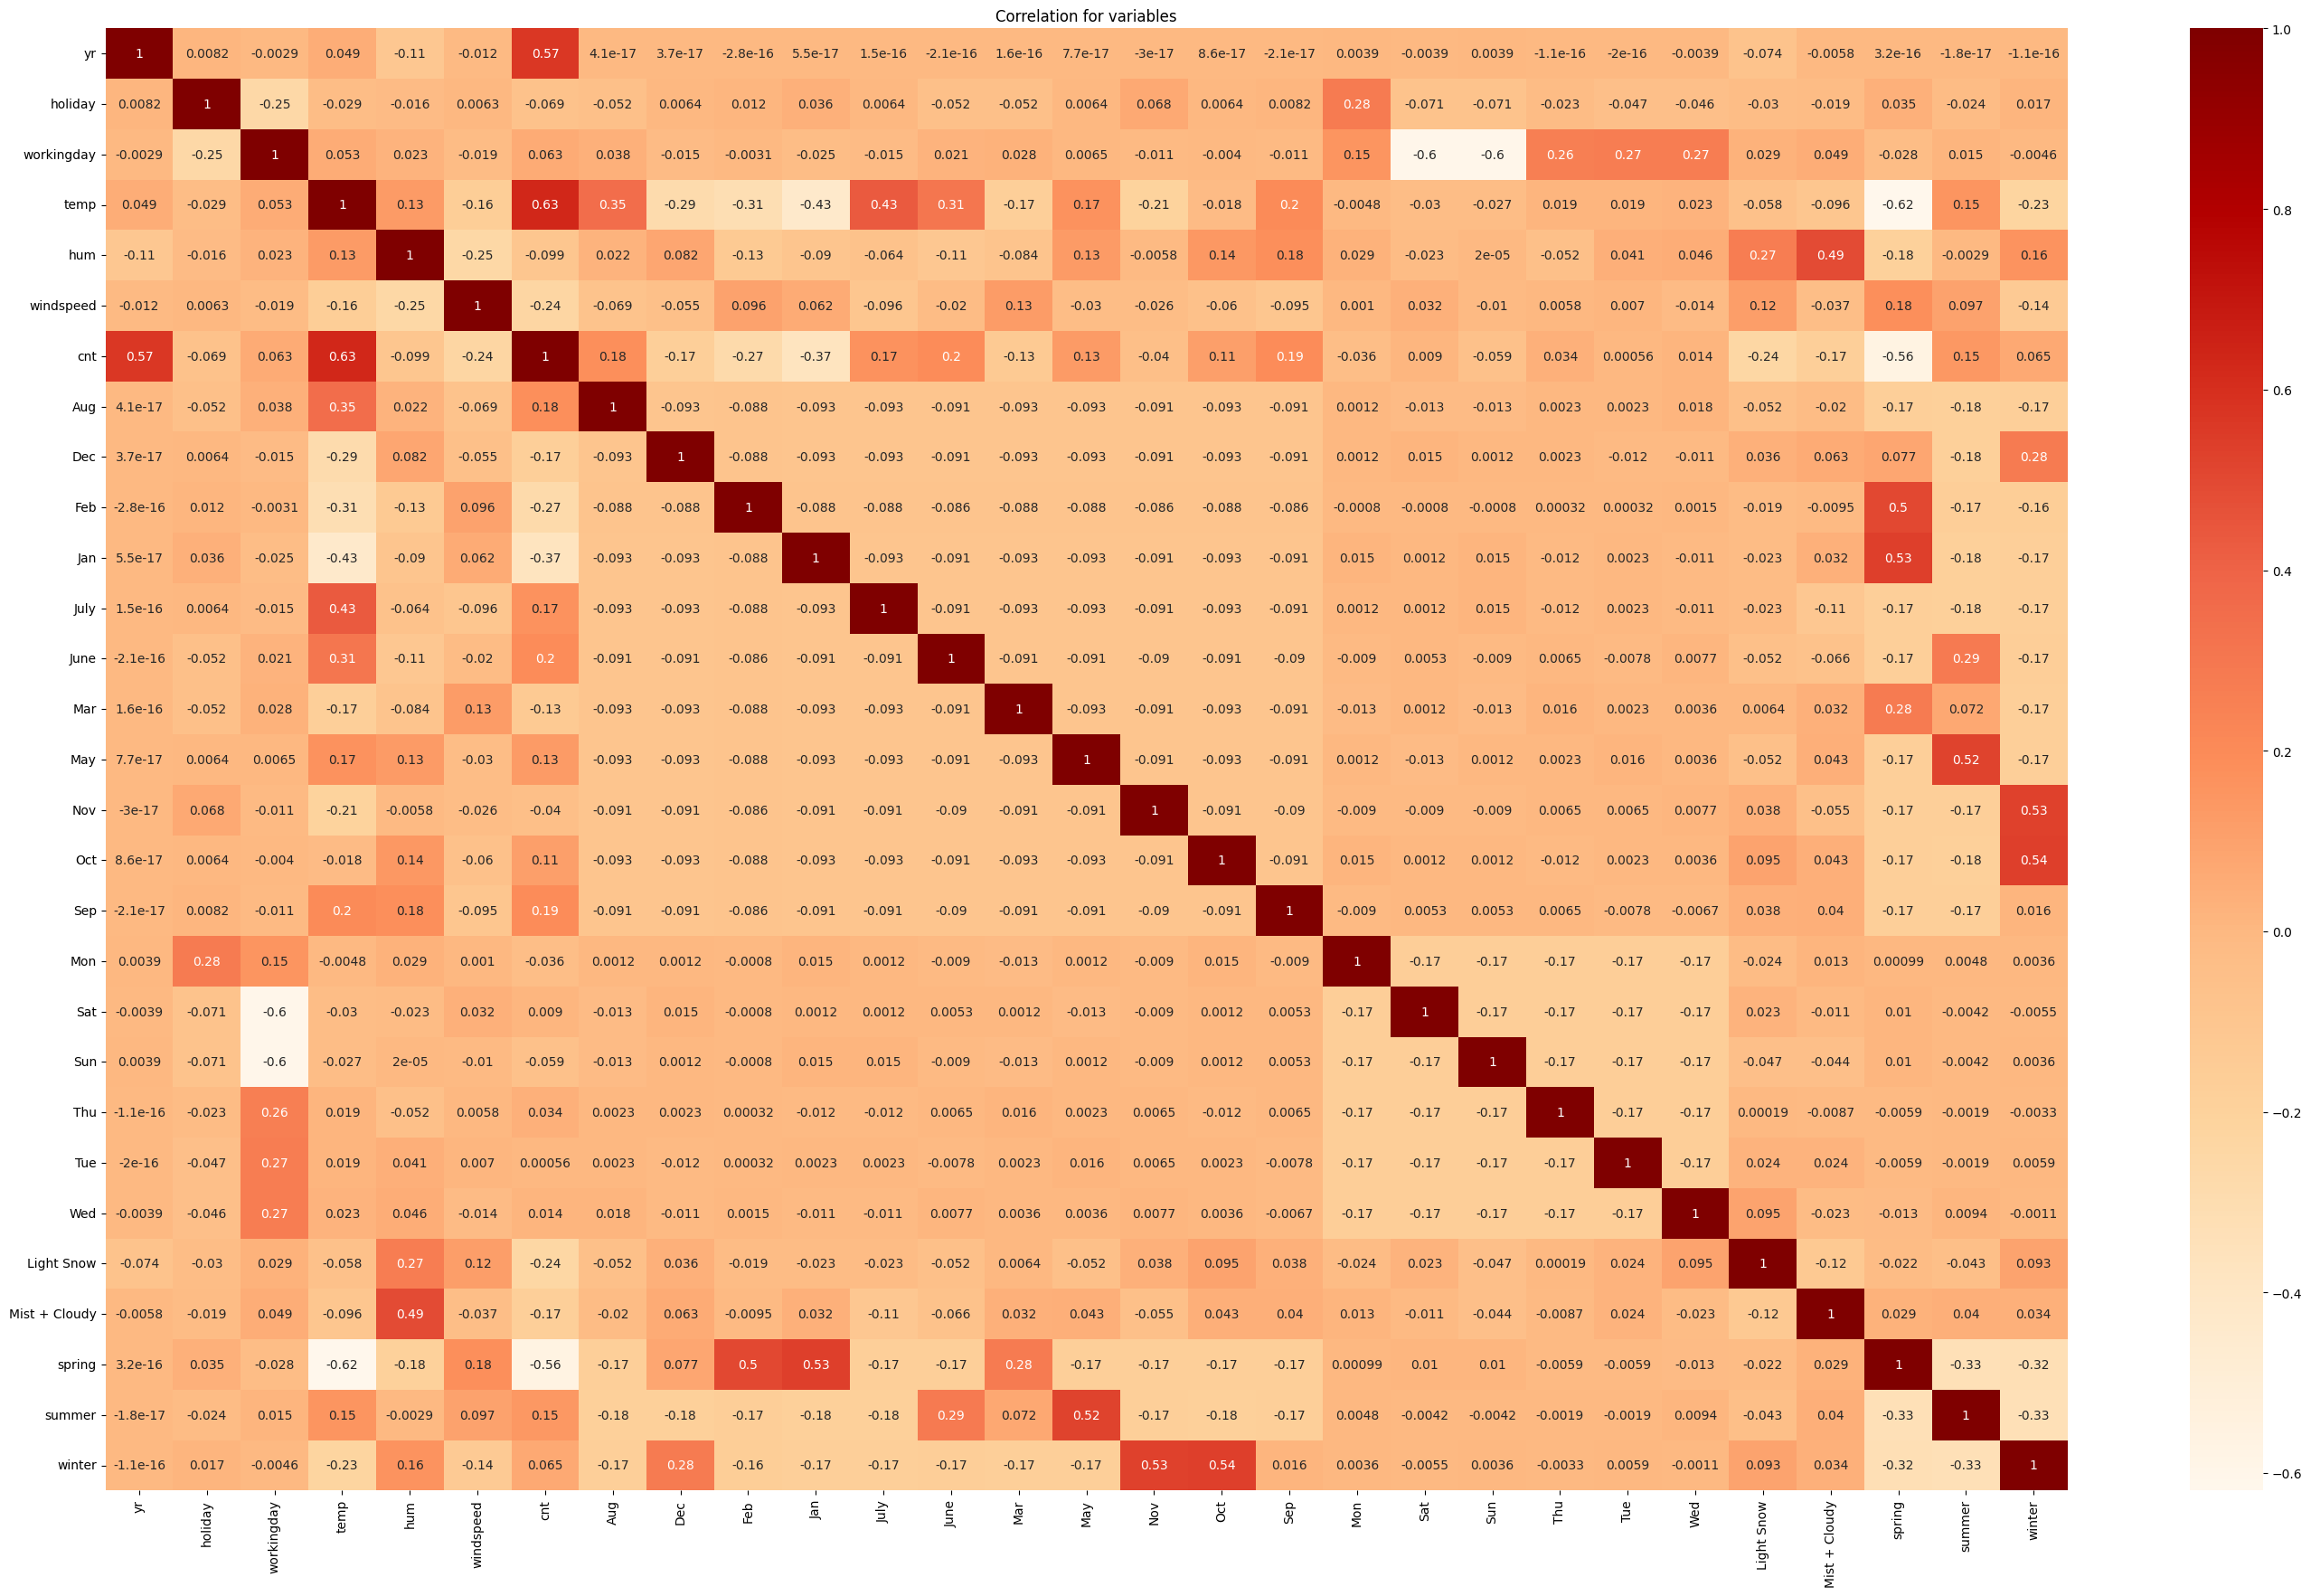

In [31]:
plt.figure(figsize=(35, 21))
sns.heatmap(boom_day.corr(), cmap='OrRd', annot=True)
plt.title('Correlation for variables')
plt.show()


## Data Preparation

In [32]:
#splitting the data into train and test sets (70,30)
day_train, day_test = train_test_split(boom_day, train_size=0.7, random_state=100)

In [33]:
day_train.shape

(510, 29)

In [34]:
day_test.shape

(220, 29)

In [35]:
day_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.108257,63.123710,12.834912,4485.337255
std,0.500429,0.157763,0.468282,7.431626,14.153170,5.292031,1950.666077
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000
50%,1.000000,0.000000,1.000000,20.277923,63.437500,12.083182,4530.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000


Let's rescale the variables as variables like hum, temp, windspeed, cnt have large values as compared to the other variables of the data

In [36]:
# using scaler.fit_transform() 
scaler = MinMaxScaler()
sclr_var = ['hum', 'windspeed', 'temp', 'cnt']
day_train[sclr_var] = scaler.fit_transform(day_train[sclr_var])

In [37]:
day_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


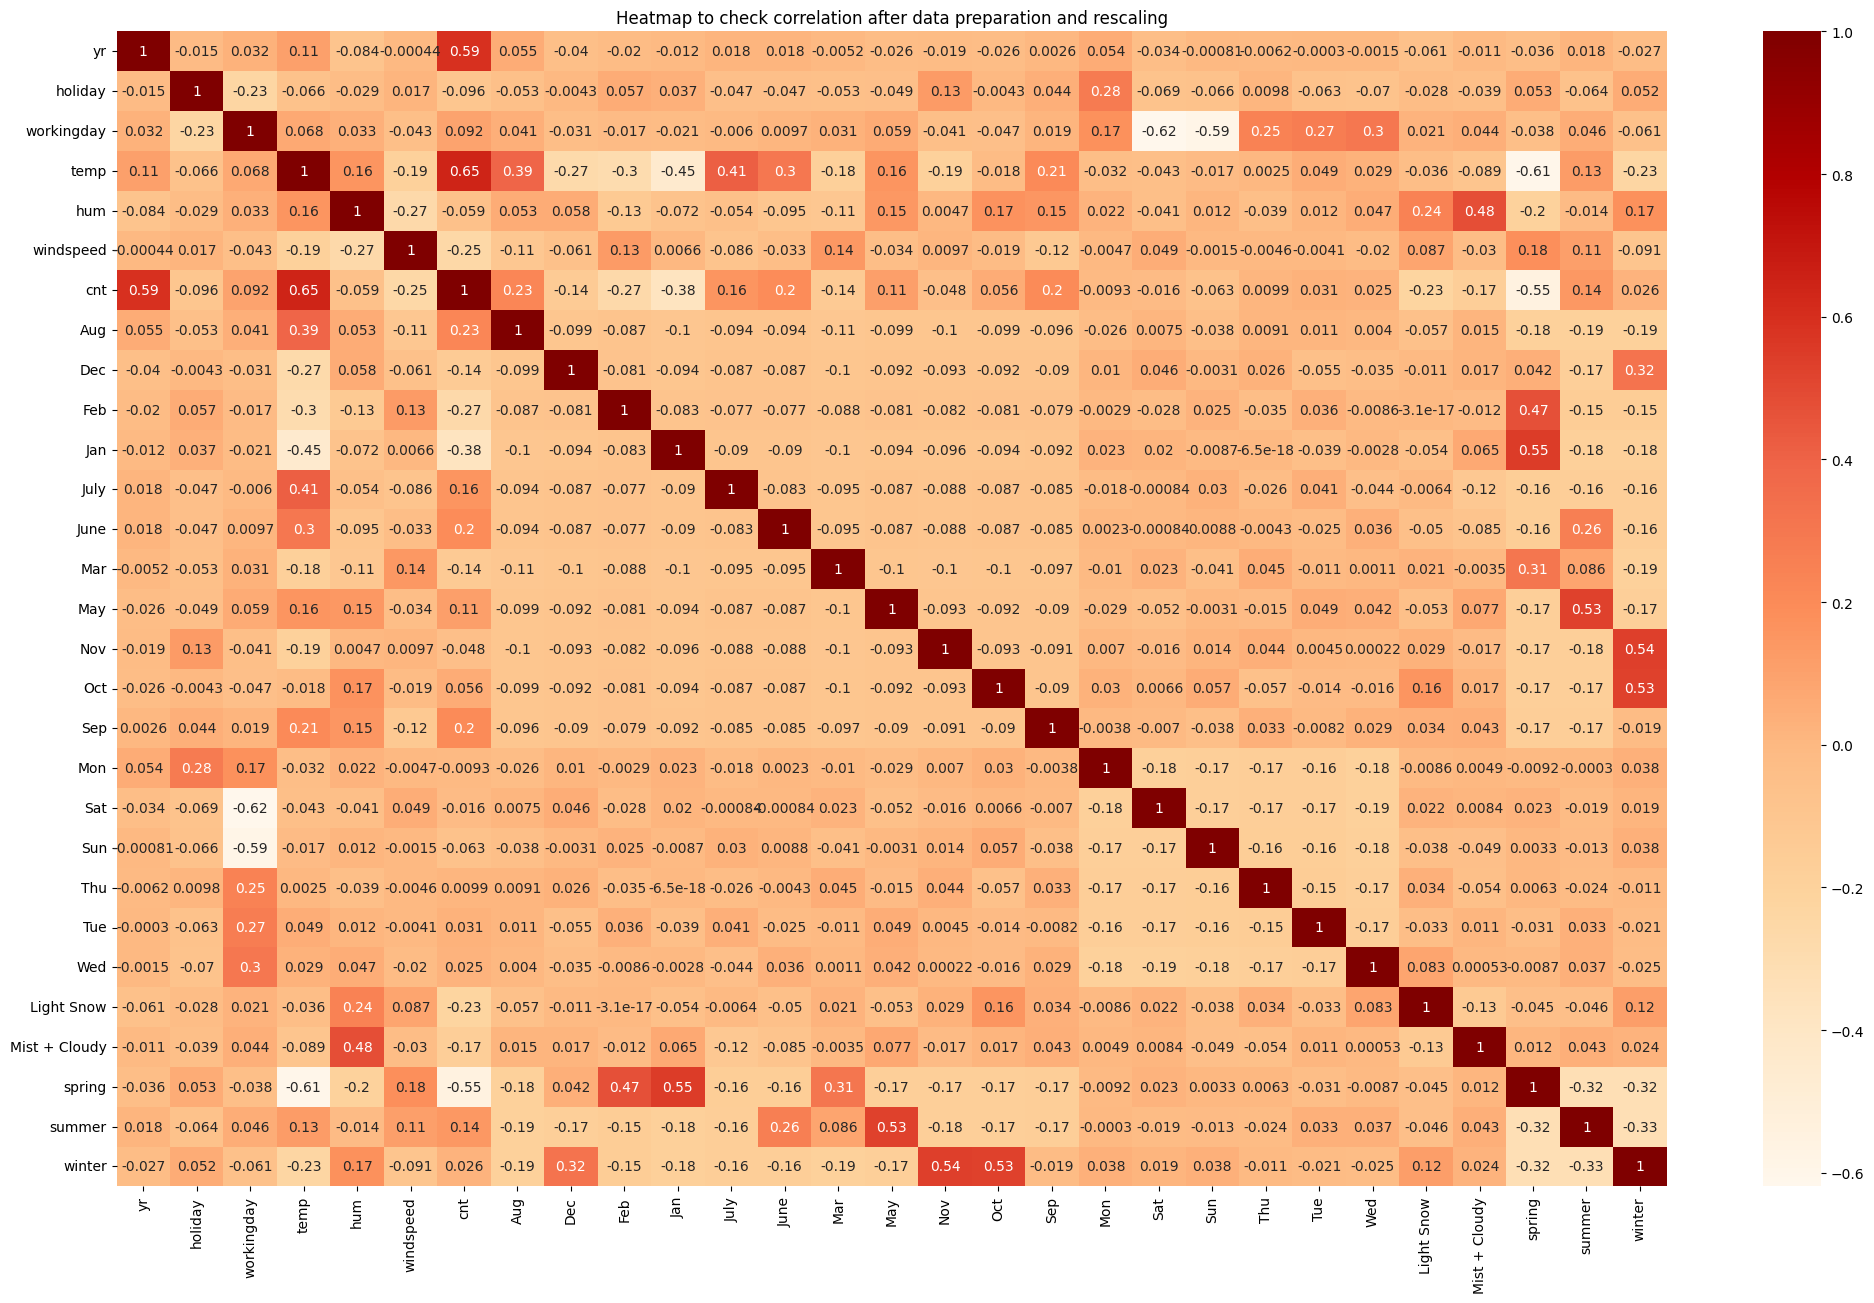

In [38]:
# checking the correlation coefficients to see which variables are highly correlated post data preparation and rescaling

plt.figure(figsize = (25, 15))
sns.heatmap(day_train.corr(), cmap='OrRd', annot=True)
plt.title('Heatmap to check correlation after data preparation and rescaling')
plt.show()


We see from the heatmap, count seems to be heavily correlated with the temp variable. We will now observe the variance using pairplots

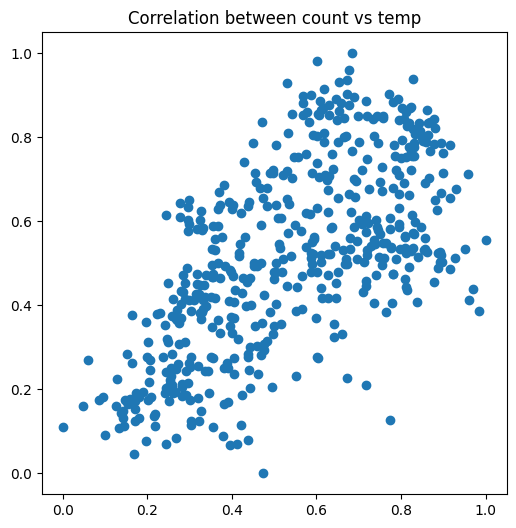

In [39]:
plt.figure(figsize=[6,6])
plt.scatter(day_train.temp, day_train.cnt)
plt.title('Correlation between count vs temp')
plt.show()

## Training the model

In [40]:
# let's build our first model using the variable temp

In [41]:
# preparing the variables for model building 

y_train = day_train.pop('cnt')
X_train = day_train

In [42]:
#check the variables
y_train.head(5)

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [43]:
X_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,False,False,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,0.245101,0.498067,0.663106,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.504508,0.188475,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,0.345824,0.751824,0.380981,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [44]:
#Let's add a constant i.e. intercept
X_train_sm = sm.add_constant(X_train['temp'])

# start first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [45]:
# check model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           2.46e-61
Time:                        23:01:52   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is .416 which means 41% of the variance in the count quantity is explained by temp

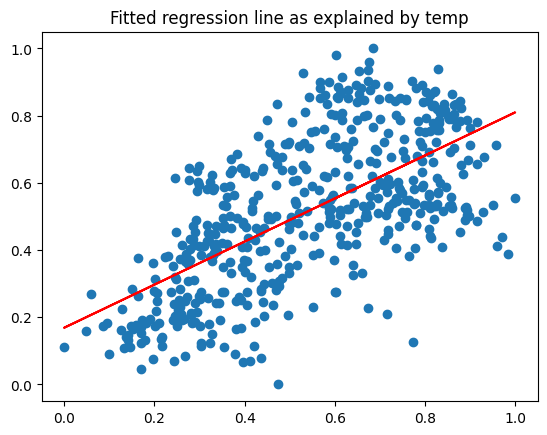

In [46]:
#visualising our data with a scatter plot and the fitted regression line to see the best fit line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409*X_train_sm.iloc[:, 1], 'r')
plt.title('Fitted regression line as explained by temp')
plt.show()

In [47]:
# add another variable to perform multiple regression 
# add variable yr and check to see if it improves the R-squared

X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

# start second model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [48]:
#check summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.34e-130
Time:                        23:01:52   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is now .692 which means 69% of the variance in the count quantity is explained by temperature and year dat

In [49]:
# add all variables and look the R-squared values
# check all the variables in our dataset
boom_day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter'],
      dtype='object')

In [50]:
# build model with all variables
X_train_sm_1 = sm.add_constant(X_train)
X_train_sm_1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1.0,1,0,1,0.815169,0.725633,0.264686,False,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1.0,1,0,0,0.442393,0.640189,0.255342,False,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1.0,1,0,0,0.245101,0.498067,0.663106,False,True,False,...,False,True,False,False,False,False,False,True,False,False
482,1.0,1,0,0,0.395666,0.504508,0.188475,False,False,False,...,True,False,False,False,False,False,True,False,True,False
111,1.0,0,0,1,0.345824,0.751824,0.380981,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [51]:
X_train_sm_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          510 non-null    float64
 1   yr             510 non-null    int64  
 2   holiday        510 non-null    int64  
 3   workingday     510 non-null    int64  
 4   temp           510 non-null    float64
 5   hum            510 non-null    float64
 6   windspeed      510 non-null    float64
 7   Aug            510 non-null    bool   
 8   Dec            510 non-null    bool   
 9   Feb            510 non-null    bool   
 10  Jan            510 non-null    bool   
 11  July           510 non-null    bool   
 12  June           510 non-null    bool   
 13  Mar            510 non-null    bool   
 14  May            510 non-null    bool   
 15  Nov            510 non-null    bool   
 16  Oct            510 non-null    bool   
 17  Sep            510 non-null    bool   
 18  Mon          

In [52]:
# start third model
lr = sm.OLS(y_train, X_train_sm_1.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.params

const            0.243106
yr               0.232438
holiday          0.010042
workingday       0.096177
temp             0.445359
hum             -0.151473
windspeed       -0.186010
Aug              0.020376
Dec             -0.044277
Feb             -0.032441
Jan             -0.063315
July            -0.033848
June             0.004602
Mar              0.001274
May              0.024673
Nov             -0.039879
Oct              0.007546
Sep              0.085938
Mon             -0.020931
Sat              0.095554
Sun              0.041333
Thu             -0.009131
Tue             -0.017931
Wed             -0.005495
Light Snow      -0.255835
Mist + Cloudy   -0.059551
spring          -0.044834
summer           0.043002
winter           0.107632
dtype: float64

In [53]:
# check summary with all the variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.00e-181
Time:                        23:01:52   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2431      0.035      6.888      0.000       0.174       0.312
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0100      0.024      0.418      0.676      -0.037       0.057
workingday        0.0962      0.012      7.835      0.000       0.072       0.120
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
July             -0.0338      0.035     -0.969      0.333      -0.102       0.035
June              0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Mon              -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat               0.0956      0.014      6.958      0.000       0.069       0.123
Sun               0.0413      0.014      2.964      0.003       0.014       0.069
Thu              -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue              -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     7.28e+15
================================================================

R-squared is now .853 which means 85% of the variance in the count quantity is explained with all the variables

Using RFE:

We have found out the R-squared values and the best fit lines using the manual approach for feature selection. We will now using the automated approach for selecting the values required for building the most optimized models and dropping the values which are redundant for our model building approach. We will now use RFE for automated approach, along with VIF to determine the variables to drop.

In [54]:
# check the number of columns in our dataset
len(boom_day.columns)

29

In [55]:
# create the RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

# set feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

# fit rfe object on our training dataset
rfe = rfe.fit(X_train, y_train)

In [56]:
# check the elements selected and the ones rejected in a list after rfe
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [57]:
# get the selected feature variables in one variable
true_rfe = X_train.columns[rfe.support_]

In [58]:
# check the values of true_rfe
true_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [59]:
len(true_rfe)

15

In [60]:
# build model using selected RFE variables
# create training set with RFE selected variables
X_train_rfe = X_train[true_rfe]

In [61]:
# add constant to training variable
X_train_rfe = sm.add_constant(X_train_rfe)

# start first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_rfe.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.params

const            0.251893
yr               0.230527
holiday         -0.058173
workingday       0.043335
temp             0.509619
hum             -0.156299
windspeed       -0.186259
Jan             -0.034512
July            -0.052918
Sep              0.081395
Sat              0.053552
Light Snow      -0.247464
Mist + Cloudy   -0.056318
spring          -0.050897
summer           0.050762
winter           0.093301
dtype: float64

In [62]:
#summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.22e-191
Time:                        23:01:52   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969      0.000       0.181       0.323
yr                0.2305      0.008     28.795      0.000       0.215       0.246
holiday          -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday        0.0433      0.012      3.762      0.000       0.021       0.066
temp              0.5096      0.034     14.837      0.000       0.442       0.577
hum              -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed        -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Jan              -0.0345      0.017     -1.989      0.047      -0.069      -0.000
July             -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep               0.0814      0.016      4.945      0.000       0.049       0.114
Sat               0.0536      0.014      3.694      0.000       0.025       0.082
Light Snow       -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist + Cloudy    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring           -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer            0.0508      0.015      3.423      0.001       0.022       0.080
winter            0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# check the VIF of the model 

# drop the constant variables from the dataset
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [64]:
# calculate the VIF of the model
vif = pd.DataFrame()
X = X_train_rfe.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Mist + Cloudy,2.29
0,yr,2.09
9,Sat,1.98


In [65]:
# workingday variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['workingday'], axis = 1)

In [66]:
# add constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

# start first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1.astype(float))

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.10e-189
Time:                        23:01:52   Log-Likelihood:                 512.44
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     495   BIC:                            -931.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2920      0.035      8.344      0.000       0.223       0.361
yr                0.2305      0.008     28.422      0.000       0.215       0.246
holiday          -0.0933      0.026     -3.652      0.000      -0.143      -0.043
temp              0.5128      0.035     14.740      0.000       0.444       0.581
hum              -0.1651      0.038     -4.375      0.000      -0.239      -0.091
windspeed        -0.1887      0.026     -7.311      0.000      -0.239      -0.138
Jan              -0.0337      0.018     -1.915      0.056      -0.068       0.001
July             -0.0559      0.018     -3.060      0.002      -0.092      -0.020
Sep               0.0824      0.017      4.941      0.000       0.050       0.115
Sat               0.0177      0.011      1.602      0.110      -0.004       0.040
Light Snow       -0.2405      0.026     -9.141      0.000      -0.292      -0.189
Mist + Cloudy    -0.0532      0.010     -5.083      0.000      -0.074      -0.033
spring           -0.0519      0.021     -2.479      0.013      -0.093      -0.011
summer            0.0503      0.015      3.351      0.001       0.021       0.080
winter            0.0914      0.017      5.229      0.000       0.057       0.126
==============================================================================
Omnibus:                       64.600   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.650
Skew:                          -0.701   Prob(JB):                     7.81e-31
Kurtosis:                       5.135   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# now check the VIF of the model 

# drop the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)


In [68]:
# calculate the VIF of the model
vif = pd.DataFrame()
X = X_train_new_1.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,29.02
2,temp,16.75
4,windspeed,4.68
11,spring,4.35
13,winter,3.38
12,summer,2.79
10,Mist + Cloudy,2.29
0,yr,2.09
5,Jan,1.67
6,July,1.59


In [69]:
# Sat variable can be dropped due to low VIF and high p-value
X_train_new_2 = X_train_lr1.drop(['Sat'], axis = 1)

In [70]:
# add constant to training variable
X_train_lr2 = sm.add_constant(X_train_new_2)

# start first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr2.astype(float))

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.59e-190
Time:                        23:01:52   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2964      0.035      8.483      0.000       0.228       0.365
yr                0.2301      0.008     28.339      0.000       0.214       0.246
holiday          -0.0963      0.026     -3.773      0.000      -0.146      -0.046
temp              0.5124      0.035     14.706      0.000       0.444       0.581
hum              -0.1681      0.038     -4.452      0.000      -0.242      -0.094
windspeed        -0.1874      0.026     -7.253      0.000      -0.238      -0.137
Jan              -0.0333      0.018     -1.892      0.059      -0.068       0.001
July             -0.0556      0.018     -3.039      0.003      -0.092      -0.020
Sep               0.0827      0.017      4.951      0.000       0.050       0.116
Light Snow       -0.2392      0.026     -9.084      0.000      -0.291      -0.187
Mist + Cloudy    -0.0526      0.010     -5.025      0.000      -0.073      -0.032
spring           -0.0519      0.021     -2.476      0.014      -0.093      -0.011
summer            0.0502      0.015      3.336      0.001       0.021       0.080
winter            0.0919      0.018      5.247      0.000       0.057       0.126
==============================================================================
Omnibus:                       58.633   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.919
Skew:                          -0.626   Prob(JB):                     2.26e-29
Kurtosis:                       5.154   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# check the VIF of the model 

# drop the constant variables from the dataset
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)

In [72]:
# calculate the VIF of the model
vif = pd.DataFrame()
X = X_train_new_2.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,29.02
2,temp,16.71
4,windspeed,4.66
10,spring,4.34
12,winter,3.36
11,summer,2.79
9,Mist + Cloudy,2.29
0,yr,2.09
5,Jan,1.67
6,July,1.59


In [73]:
# hum variable can be dropped due to a high VIF
X_train_new_3 = X_train_lr2.drop(['hum'], axis = 1)

In [74]:
# add constant to training variable
X_train_lr3 = sm.add_constant(X_train_new_3)

# create first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr3.astype(float))

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.14e-187
Time:                        23:01:52   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2154      0.030      7.088      0.000       0.156       0.275
yr                0.2343      0.008     28.517      0.000       0.218       0.250
holiday          -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp              0.4721      0.034     13.772      0.000       0.405       0.539
windspeed        -0.1549      0.025     -6.135      0.000      -0.205      -0.105
Jan              -0.0383      0.018     -2.138      0.033      -0.073      -0.003
July             -0.0503      0.019     -2.706      0.007      -0.087      -0.014
Sep               0.0764      0.017      4.506      0.000       0.043       0.110
Light Snow       -0.2854      0.025    -11.575      0.000      -0.334      -0.237
Mist + Cloudy    -0.0793      0.009     -9.067      0.000      -0.096      -0.062
spring           -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer            0.0434      0.015      2.845      0.005       0.013       0.073
winter            0.0757      0.017      4.335      0.000       0.041       0.110
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# check the VIF of the model 

# drop the constant variables from the dataset
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)

In [76]:
# calculate the VIF of the model
vif = pd.DataFrame()
X = X_train_new_3.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,yr,2.07
11,winter,1.78
4,Jan,1.61
5,July,1.59
8,Mist + Cloudy,1.56
6,Sep,1.34


In [77]:
# windspeed variable can be dropped due to high p value and negative correlation with cnt
X_train_new_4 = X_train_lr3.drop(['windspeed'], axis = 1)

In [78]:
# add constant to training variable
X_train_lr4 = sm.add_constant(X_train_new_4)

# start first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr4.astype(float))

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.83e-180
Time:                        23:01:53   Log-Likelihood:                 482.52
No. Observations:                 510   AIC:                            -941.0
Df Residuals:                     498   BIC:                            -890.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1586      0.030      5.289      0.000       0.100       0.218
yr                0.2330      0.009     27.382      0.000       0.216       0.250
holiday          -0.0999      0.027     -3.710      0.000      -0.153      -0.047
temp              0.4914      0.035     13.894      0.000       0.422       0.561
Jan              -0.0240      0.018     -1.307      0.192      -0.060       0.012
July             -0.0513      0.019     -2.659      0.008      -0.089      -0.013
Sep               0.0810      0.018      4.617      0.000       0.047       0.116
Light Snow       -0.3002      0.025    -11.804      0.000      -0.350      -0.250
Mist + Cloudy    -0.0778      0.009     -8.596      0.000      -0.096      -0.060
spring           -0.0734      0.022     -3.351      0.001      -0.116      -0.030
summer            0.0344      0.016      2.188      0.029       0.004       0.065
winter            0.0791      0.018      4.376      0.000       0.044       0.115
==============================================================================
Omnibus:                       68.324   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.088
Skew:                          -0.692   Prob(JB):                     3.16e-37
Kurtosis:                       5.449   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# check the VIF of the model 

# drop the constant variables from the dataset
X_train_lr4 = X_train_lr4.drop(['const'], axis = 1)

In [80]:
# calculate the VIF of the model
vif = pd.DataFrame()
X = X_train_new_4.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,4.28
0,yr,2.07
8,spring,1.99
9,summer,1.94
3,Jan,1.60
4,July,1.59
10,winter,1.57
7,Mist + Cloudy,1.56
5,Sep,1.34
6,Light Snow,1.07


In [81]:
# July is dropped because of low VIF and the p-value
X_train_new_5 = X_train_lr4.drop(['July'], axis = 1)

In [82]:
# add constant to training variable
X_train_lr5 = sm.add_constant(X_train_new_5)

# start first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr5.astype(float))

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.12e-180
Time:                        23:01:53   Log-Likelihood:                 478.92
No. Observations:                 510   AIC:                            -935.8
Df Residuals:                     499   BIC:                            -889.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1509      0.030      5.024      0.000       0.092       0.210
yr                0.2336      0.009     27.295      0.000       0.217       0.250
holiday          -0.0987      0.027     -3.645      0.000      -0.152      -0.046
temp              0.4774      0.035     13.568      0.000       0.408       0.547
Jan              -0.0261      0.018     -1.412      0.159      -0.062       0.010
Sep               0.0949      0.017      5.633      0.000       0.062       0.128
Light Snow       -0.3011      0.026    -11.770      0.000      -0.351      -0.251
Mist + Cloudy    -0.0764      0.009     -8.400      0.000      -0.094      -0.059
spring           -0.0616      0.022     -2.854      0.005      -0.104      -0.019
summer            0.0495      0.015      3.357      0.001       0.021       0.079
winter            0.0913      0.018      5.190      0.000       0.057       0.126
==============================================================================
Omnibus:                       70.127   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.705
Skew:                          -0.717   Prob(JB):                     2.32e-37
Kurtosis:                       5.426   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# check the VIF of the model 

# drop the constant variables from the dataset
X_train_lr5 = X_train_lr5.drop(['const'], axis = 1)

In [84]:
# calculate the VIF of the model
vif = pd.DataFrame()
X = X_train_new_5.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,2.92
0,yr,2.07
7,spring,1.89
8,summer,1.63
3,Jan,1.60
6,Mist + Cloudy,1.56
9,winter,1.43
4,Sep,1.23
5,Light Snow,1.07
1,holiday,1.04


The R-squared value achieved is 82.7% which suggests a high correlation between the dependent variable (count) and the independent variables and the variables selected accurately help us map the variance of the dependent variable ie count.

### Step 4: Residual analysis

In [85]:
X_train_lr5 = sm.add_constant(X_train_lr5)
X_train_lr5

,const,yr,holiday,temp,Jan,Sep,Light Snow,Mist + Cloudy,spring,summer,winter
576,1.0,1,0,0.815169,False,False,False,False,False,False,False
426,1.0,1,0,0.442393,False,False,False,True,True,False,False
728,1.0,1,0,0.245101,False,False,False,False,True,False,False
482,1.0,1,0,0.395666,False,False,False,True,False,True,False
111,1.0,0,0,0.345824,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,False,False,False,False,False,False,False
53,1.0,0,0,0.202618,False,False,False,False,True,False,False
350,1.0,0,0,0.248216,False,False,False,True,False,False,True
79,1.0,0,0,0.462664,False,False,False,True,False,True,False


In [86]:
# get the y_train_pred for residual analysis
y_train_pred = lr_model.predict(X_train_lr5)

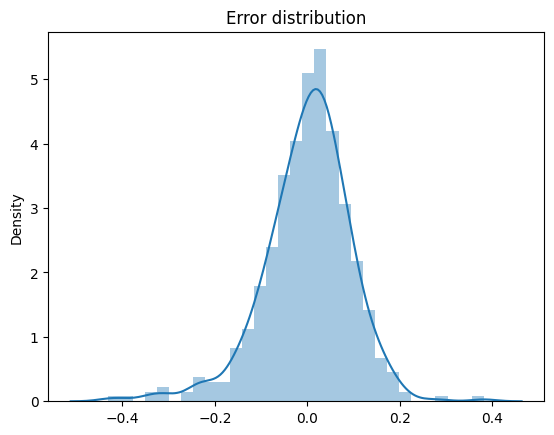

In [87]:
res = y_train - y_train_pred
# distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.title('Error distribution')
plt.show()

In [88]:
# perform standardization (MinMax scaling) on test set
# check the variables to be standardized
sclr_var

['hum', 'windspeed', 'temp', 'cnt']

In [89]:
#perform scaling on test data set
#train dataset is to be fit, test dataset is not fit but simply transformed
#test dataset is transformed based on fit of train dataset
day_test[sclr_var] = scaler.transform(day_test[sclr_var])


In [90]:
day_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [91]:
# build test model using the variable temp
# prepare the variables for model building 

y_test = day_test.pop('cnt')
X_test = day_test

In [92]:
# check the variables
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [93]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
535,1,0,1,0.901354,0.610133,0.153728,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
299,0,0,1,0.511964,0.837699,0.334206,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
221,0,0,1,0.881625,0.437098,0.339570,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
152,0,0,1,0.817246,0.314298,0.537414,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [94]:
# Print feature variables

X_train_lr5.columns

Index(['const', 'yr', 'holiday', 'temp', 'Jan', 'Sep', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [95]:
 # drop constant
X_train_lr5.drop(columns= 'const', inplace = True)

In [96]:
# create new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr5.columns]

# add a constant variable
X_test_new = sm.add_constant(X_test_new)

In [97]:
# start predictions
y_pred = lr_model.predict(X_test_new)

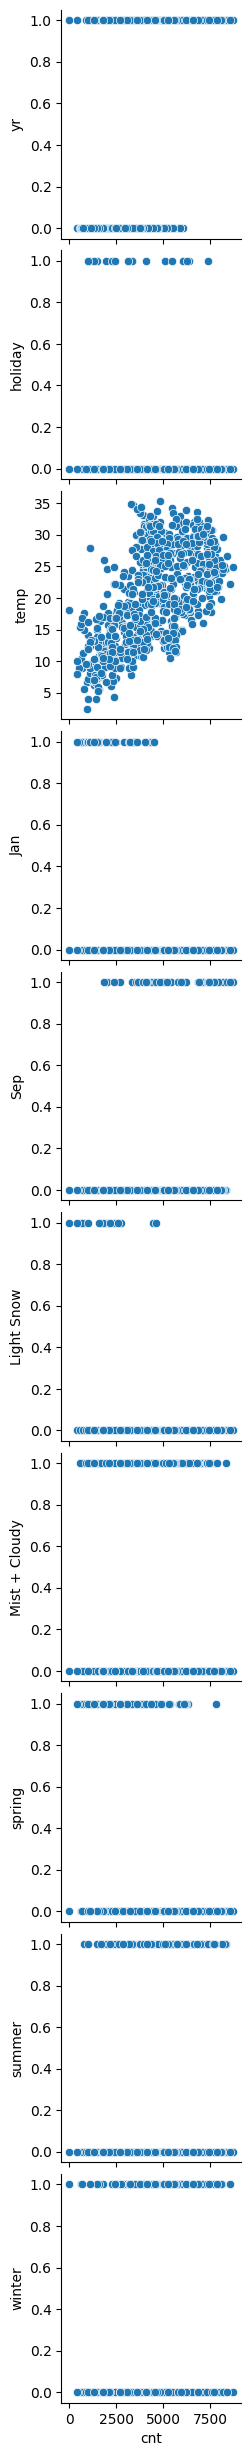

<Figure size 1600x1200 with 0 Axes>

In [98]:
# Let's now build a scatter plot to observe relationship between the dependent and the feature variables

sns.pairplot(boom_day, y_vars=X_train_lr5.columns, x_vars='cnt')
plt.figure(figsize = (16, 12))
plt.show()


We can validate the assumptions of linear regression in the model:

- temperature has a linear relationship with the dependent variable (cnt).
- every variable in our chosen model has a VIF<5 which ensures that there is no mulitcollinearity.
- The error distribution as observed above is normal (ie concentrated around 0) which is another assumption of linear regression.

### Step 5: Prediction and evaluation of the test set

In [99]:
#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

r2 score on the test set is 0.8088875297553134


In [100]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2 score on the train set is 0.8219286184885533


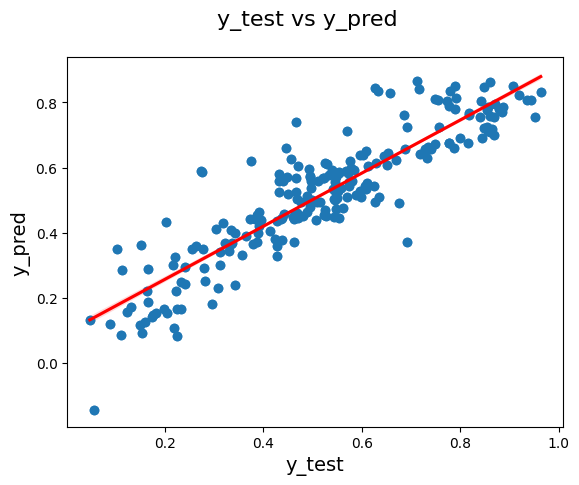

In [101]:
# Plot y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred.astype(float), ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

In [102]:
# find out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.00895093002634584
Mean squared error of the test set is 0.009137905069641458


Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets

### Summary:

The summary of the model after all required processes of test model are as follows-

1. The R-squared value of the train set is 82.19% and the test set has a R-squared value of 80.88% which interprets that our model broadly explains that **the variance quite accurately on the test set** and thus we can conclude that **it is a good model.**

2. The developed model's mean squared error is almost 0 on both the training and testing datasets which suggests that **the variance is accurately predicted on the test set**.

3. It can also be concluded that **the bike demands for the BoomBikes is company is dependent on the temperature and whether it is a workingday or not**. Additionally **more rentals seem to be demanded on the winters as compared to the summer and spring**. We have also observed that the **months of September and October had higher use of rentals**. When it comes to the days **the maximum focus was on days like Wed, Thurs and Sat and more on holidays**.

4. These interpretations help us derive meaningful insights in the bike rental market and the behaviour of the people. One of the recommendations based on this model are that **there should be aggressive marketing in the summer and spring season to drive up rentals**. Since the summer months also show low rental levels, a strong marketing strategy for the first 6 months of the year can assist in driving up the rental numbers. There has to be an approach required to **introduce more users on days where the weather is less clear, perhaps with incentives or strategic deals**. Rentals were more in 2019 than 2018 which suggests that over time more people would be exposed to this idea and there has to a strong analysis done to retain the repeat customers.